In [1]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("toramky/automobile-dataset")

#print("Path to dataset files:", path)

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Agregar la carpeta 'src' al sys.path
import sys
import os

sys.path.append(os.path.abspath("../../src"))

# Ahora puedes importar utils
from utils import cargar_datos_pd
from utils import ver_resumen_nulos
from utils import limpiar_letras_de_numeros
from utils import obtener_filas_no_numericas
from utils import identificar_atipicos_IQR
from utils import ver_diccionario
from utils import imprimir_bigotes
from utils import obtener_filas_no_fechas
#C:\Users\edgar\OneDrive\Documentos\codingDojo\Machine_Learning_DS02\data\Automobile_data.csv
#C:\Users\edgar\OneDrive\Documentos\codingDojo\Machine_Learning_DS02\notebooks\semana1\analisis_eda_practica.ipynb
ruta_archivo = "../../data/Automobile_data.csv"
columna = 'nombre_columna'
titulo = 'titulo'

from sklearn.metrics import pairwise_distances
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

# Suponiendo que `distancias_promedio` es el DataFrame que retorna la función
def graficar_distancias(distancias_promedio):
    plt.figure(figsize=(10, 6))
    plt.hist(distancias_promedio[0], bins=20, color='skyblue', edgecolor='black')
    plt.title('Distribución de las distancias promedio por marca')
    plt.xlabel('Distancia promedio')
    plt.ylabel('Frecuencia')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.boxplot(distancias_promedio[0], vert=False)
    plt.title('Diagrama de caja de distancias promedio por marca')
    plt.xlabel('Distancia promedio')
    plt.show()


def buscar_marca_similar(df, marca_objetivo):
    # Verificar si la marca objetivo existe en el DataFrame
    if marca_objetivo not in df['make'].unique():
        raise ValueError(f"La marca '{marca_objetivo}' no está presente en el DataFrame.")

    # Filtrar el DataFrame para incluir solo la marca objetivo
    df_objetivo = df[df['make'] == marca_objetivo]

    # Filtrar el DataFrame para eliminar marcas sin 'normalized-losses'
    df_filtrado = df.dropna(subset=['normalized-losses'])

    # Seleccionar las columnas numéricas relevantes
    columns_numericas = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 
                         'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg']

    # Escalar los datos numéricos
    scaler = StandardScaler()
    df_scaled = df_filtrado.copy()
    df_scaled[columns_numericas] = scaler.fit_transform(df_filtrado[columns_numericas])

    df_objetivo_scaled = df_objetivo.copy()
    df_objetivo_scaled[columns_numericas] = scaler.transform(df_objetivo[columns_numericas])

    # Calcular la distancia entre la marca objetivo y las demás marcas
    distancias = pairwise_distances(df_scaled[columns_numericas], 
                                    df_objetivo_scaled[columns_numericas], 
                                    metric='euclidean')

    # Crear un DataFrame con las distancias y las marcas
    distancias_df = pd.DataFrame(distancias, index=df_scaled.index)
    distancias_df['make'] = df_scaled['make'].values

    # Agrupar por marca y obtener la distancia promedio
    distancias_promedio = distancias_df.groupby('make').mean().sort_values(by=0)

    # Graficamos para ver
    graficar_distancias(distancias_promedio)
    
    # Mostrar las marcas más similares a la marca objetivo
    return distancias_promedio.head()

def tiene_nulos(df,marca):
    tiene_nulos = df[df['make'] == marca]['normalized-losses'].isnull().any()
    if tiene_nulos:
        print(f"La marca {marca} SIIIII TIENE VALORES NULOS!!!!! en 'normalized-losses'.")
    else:
        print(f"La marca {marca} no tiene valores nulos en 'normalized-losses'.")


    

**Instrucciones:**

**Parte 1: Análisis Exploratorio de Datos (EDA)**

 1. Carga y Exploración de Datos:

In [2]:
#Cargar el dataset y revisar la estructura básica.
#Carganos el archivo. Se modifico manualmente el archivo para la limpieza.
# Carga los datos del archivo CSV utilizando Pandas.
df = pd.read_csv(ruta_archivo, sep=',',header=0)
df_original =df.copy()


## Limpieza de datos con Python:

### **Verificación y ajuste de tipos de datos** 

Asegúrate de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.

In [4]:
print(df.head().T)

                             0            1            2      3      4
symboling                    3            3            1      2      2
normalized-losses            ?            ?            ?    164    164
make               alfa-romero  alfa-romero  alfa-romero   audi   audi
fuel-type                  gas          gas          gas    gas    gas
aspiration                 std          std          std    std    std
num-of-doors               two          two          two   four   four
body-style         convertible  convertible    hatchback  sedan  sedan
drive-wheels               rwd          rwd          rwd    fwd    4wd
engine-location          front        front        front  front  front
wheel-base                88.6         88.6         94.5   99.8   99.4
length                   168.8        168.8        171.2  176.6  176.6
width                     64.1         64.1         65.5   66.2   66.4
height                    48.8         48.8         52.4   54.3   54.3
curb-w

In [5]:
# Descripción básica de las variables
print("Descripción de las variables:")
df.info()

Descripción de las variables:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 

In [6]:
# Detectar columnas con valores únicos ['Yes', 'No']
yes_no_columns = [col for col in df.columns if sorted(df[col].dropna().unique()) == ['No', 'Yes']]
print("Columnas con valores 'Yes' y 'No':", yes_no_columns)
# Aplicar el mapeo 'Yes' -> 1 y 'No' -> 0 a todas las columnas de una vez usando map y itertools
df[yes_no_columns] = pd.DataFrame(
    map(lambda col: df[col].map({'Yes': 1, 'No': 0}), yes_no_columns)
).T.set_axis(yes_no_columns, axis=1)

Columnas con valores 'Yes' y 'No': []


In [7]:
# Crear el diccionario con los nombres de las columnas y sus tipos de datos
data_dict = {col: str(df[col].dtype) for col in df.columns}

# Imprimir el diccionario en el formato solicitado
print("data_dict = {")
for col, dtype in data_dict.items():
    print(f"    '{col}': '{dtype}',")
print("}")


data_dict = {
    'symboling': 'int64',
    'normalized-losses': 'object',
    'make': 'object',
    'fuel-type': 'object',
    'aspiration': 'object',
    'num-of-doors': 'object',
    'body-style': 'object',
    'drive-wheels': 'object',
    'engine-location': 'object',
    'wheel-base': 'float64',
    'length': 'float64',
    'width': 'float64',
    'height': 'float64',
    'curb-weight': 'int64',
    'engine-type': 'object',
    'num-of-cylinders': 'object',
    'engine-size': 'int64',
    'fuel-system': 'object',
    'bore': 'object',
    'stroke': 'object',
    'compression-ratio': 'float64',
    'horsepower': 'object',
    'peak-rpm': 'object',
    'city-mpg': 'int64',
    'highway-mpg': 'int64',
    'price': 'object',
}


In [ ]:
data_dict = {
    'symboling': 'int64',
    'normalized-losses': 'float64',
    'make': 'category',
    'fuel-type': 'category',
    'aspiration': 'category',
    'num-of-doors': 'category',
    'body-style': 'category',
    'drive-wheels': 'category',
    'engine-location': 'category',
    'wheel-base': 'float64',
    'length': 'float64',
    'width': 'float64',
    'height': 'float64',
    'curb-weight': 'int64',
    'engine-type': 'category',
    'num-of-cylinders': 'category',
    'engine-size': 'int64',
    'fuel-system': 'category',
    'bore': 'category',
    'stroke': 'category',
    'compression-ratio': 'float64',
    'horsepower': 'category',
    'peak-rpm': 'category',
    'city-mpg': 'int64',
    'highway-mpg': 'int64',
    'price': 'float64',
}
# Convertir tipos de datos según el diccionario
for column, dtype in data_dict.items():
    df[column] = df[column].astype(dtype, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

**Detección y tratamiento de valores nulos.**

In [9]:
# La columna normalized-losses debe ser numerico pero figura como Object debido a que tiene ?
# Concepto: representa una medida normalizada de las pérdidas asociadas con seguros de automóviles. Se refiere a la cantidad estimada 
# de dinero perdido debido a siniestros en comparación con el valor del vehículo. Esta métrica ayuda a evaluar el riesgo asociado a 
# un automóvil en términos de costos de reparación o reemplazo tras un accidente. Los valores más altos indican mayores pérdidas 
# relativas, mientras que los valores bajos sugieren menores costos en situaciones de siniestro.(chatgpt)
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [10]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [11]:
# Reemplazar '?' por NaN y convertir a tipo numérico
df['normalized-losses'] = df['normalized-losses'].replace('?', np.nan).astype(float)

In [12]:
# Filtrar el DataFrame para obtener solo los valores enteros en 'normalized-losses'
df_filtrado = df[pd.to_numeric(df['normalized-losses'], errors='coerce').notnull()]

# Ver los autos por marca
result = df_filtrado.groupby('make')['normalized-losses'].mean()

print(result)


make
audi             161.000000
bmw              190.000000
chevrolet        100.000000
dodge            133.444444
honda            103.000000
jaguar           145.000000
mazda            123.933333
mercedes-benz    102.800000
mitsubishi       146.200000
nissan           135.166667
peugot           161.000000
plymouth         129.000000
porsche          186.000000
saab             127.000000
subaru            92.250000
toyota           110.290323
volkswagen       121.250000
volvo             91.454545
Name: normalized-losses, dtype: float64


In [13]:
# Obtener todas las marcas únicas
marcas_todas = df['make'].unique()

# Obtener las marcas que tienen valores en 'normalized-losses'
marcas_con_loss = df_filtrado.groupby('make')['normalized-losses'].mean().index

# Encontrar las marcas que no están en 'marcas_con_loss'
marcas_sin_loss = [marca for marca in marcas_todas if marca not in marcas_con_loss]

# Imprimir las marcas que no tienen valores en 'normalized-losses'
print(marcas_sin_loss)



['alfa-romero', 'isuzu', 'mercury', 'renault']


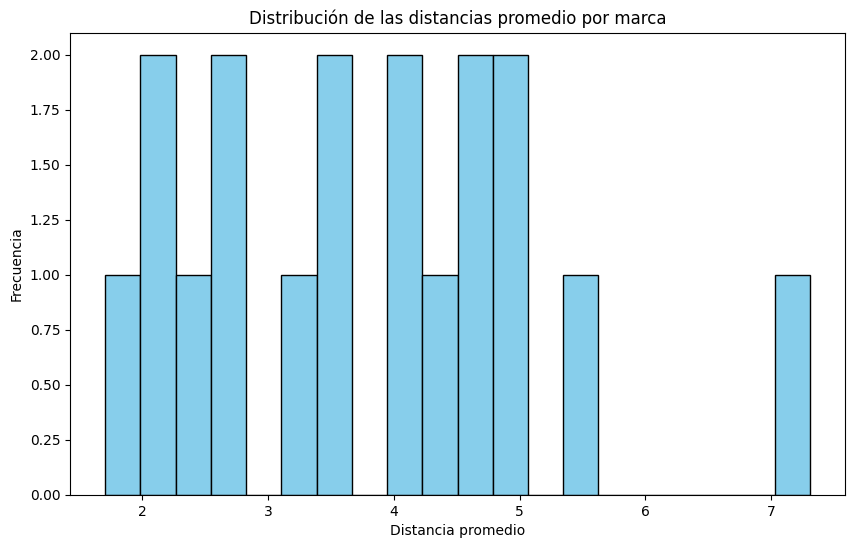

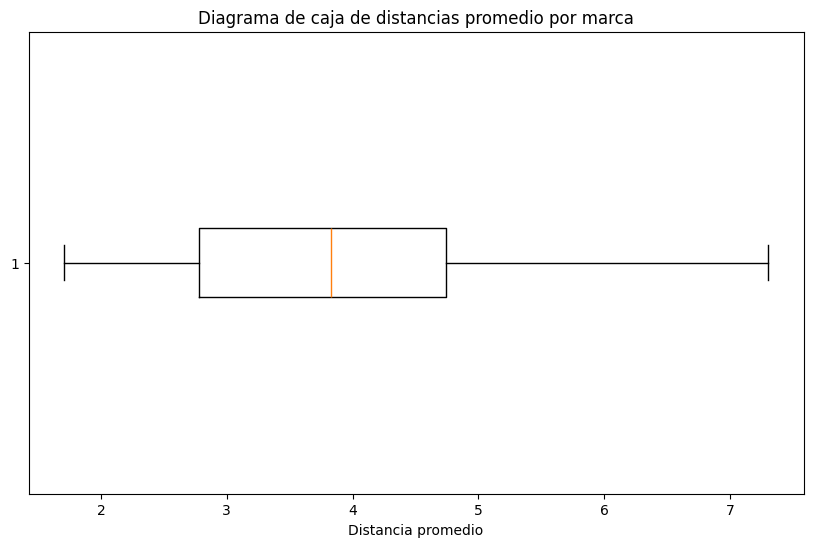

,0
make,
saab,1.704609
volvo,1.989914
audi,2.069539
bmw,2.279350
peugot,2.775010


In [14]:
#Buscamos cual es la marca mas similar a mercury. Salio Volvo
buscar_marca_similar(df,'mercury')


In [15]:
# Verificar si una marca específica tiene valores nulos en 'normalized-losses'
marca = 'saab'  # Reemplaza 'nombre_marca' por la marca que quieres verificar
tiene_nulos(df,marca)


La marca saab no tiene valores nulos en 'normalized-losses'.


In [16]:
# Filtrar solo saab y Mercury y mostrar solo las columnas relevantes
df_saab_mercury = df[df['make'].isin(['saab', 'mercury'])][['make','normalized-losses', 'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg']]

# Mostrar los resultados
print(df_saab_mercury)


        make  normalized-losses  curb-weight  engine-size horsepower  \
75   mercury                NaN         2910          140        175   
132     saab              150.0         2658          121        110   
133     saab              104.0         2695          121        110   
134     saab              150.0         2707          121        110   
135     saab              104.0         2758          121        110   
136     saab              150.0         2808          121        160   
137     saab              104.0         2847          121        160   

     city-mpg  highway-mpg  
75         19           24  
132        21           28  
133        21           28  
134        21           28  
135        21           28  
136        19           26  
137        19           26  


In [17]:
# Calcular la media de normalized-losses de saab
saab_loss = df[df['make'] == 'saab']['normalized-losses'].mean()

# Asignar el valor de la media a los autos de Mercury con valores nulos en normalized-losses
df.loc[(df['make'] == 'mercury') & (df['normalized-losses'].isnull()), 'normalized-losses'] = saab_loss



In [18]:
# Filtrar solo Volvo y Mercury y mostrar solo las columnas relevantes
df_saab_mercury = df[df['make'].isin(['saab', 'mercury'])][['make','normalized-losses', 'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg']]

# Mostrar los resultados
print(df_saab_mercury)

        make  normalized-losses  curb-weight  engine-size horsepower  \
75   mercury              127.0         2910          140        175   
132     saab              150.0         2658          121        110   
133     saab              104.0         2695          121        110   
134     saab              150.0         2707          121        110   
135     saab              104.0         2758          121        110   
136     saab              150.0         2808          121        160   
137     saab              104.0         2847          121        160   

     city-mpg  highway-mpg  
75         19           24  
132        21           28  
133        21           28  
134        21           28  
135        21           28  
136        19           26  
137        19           26  


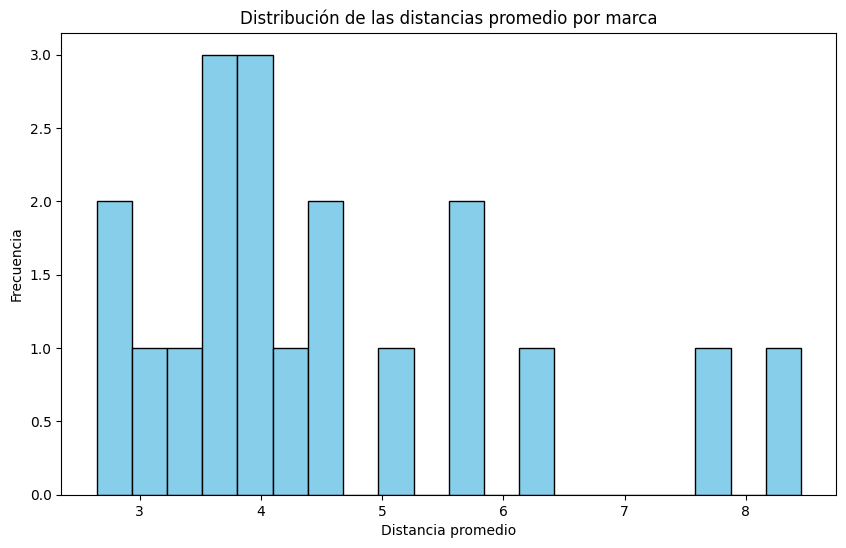

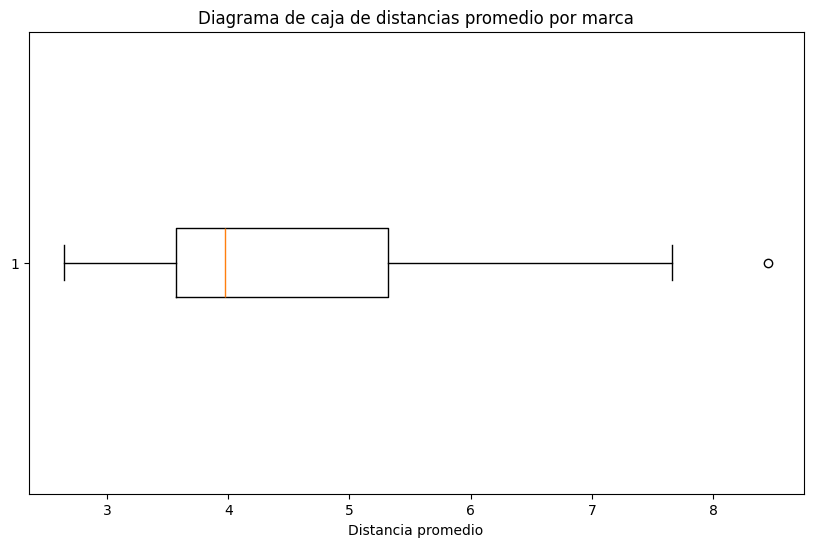

,0,1,2
make,,,
mitsubishi,2.644221,2.644221,2.861112
porsche,2.702891,2.702891,1.763084
subaru,3.195573,3.195573,2.639362
dodge,3.355125,3.355125,3.658315
mazda,3.521099,3.521099,3.139015


In [19]:
#['alfa-romero', 'isuzu', 'mercury', 'renault']
buscar_marca_similar(df,'alfa-romero')

In [20]:
# Ver si mitsubishi tiene nulos
marca='mitsubishi'
tiene_nulos(df,marca)

La marca mitsubishi SIIIII TIENE VALORES NULOS!!!!! en 'normalized-losses'.


In [21]:
# Reemplazar los valores nulos en 'normalized-losses' solo para una marca específica (por ejemplo, 'volvo')
marca_especifica = 'mitsubishi'
media_marca = df.loc[df['make'] == marca_especifica, 'normalized-losses'].mean()

# Imputar valores nulos con la media de la marca específica
df.loc[(df['make'] == marca_especifica) & (df['normalized-losses'].isnull()), 'normalized-losses'] = media_marca


In [22]:
tiene_nulos(df,marca)

La marca mitsubishi no tiene valores nulos en 'normalized-losses'.


In [23]:
# Calcular la media de normalized-losses de bmw
mitsubishi_loss = df[df['make'] == 'mitsubishi']['normalized-losses'].mean()

# Asignar el valor de la media a los autos de alfa-romero con valores nulos en normalized-losses
df.loc[(df['make'] == 'alfa-romero') & (df['normalized-losses'].isnull()), 'normalized-losses'] = mitsubishi_loss


In [24]:
# Filtrar solo mitsubishi y Alfa-Romeo y mostrar solo las columnas relevantes
df_mitsubishi_alfa_romero = df[df['make'].isin(['mitsubishi', 'alfa-romero'])][['make','normalized-losses', 'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg']]

# Mostrar los resultados
print(df_mitsubishi_alfa_romero)

           make  normalized-losses  curb-weight  engine-size horsepower  \
0   alfa-romero              146.2         2548          130        111   
1   alfa-romero              146.2         2548          130        111   
2   alfa-romero              146.2         2823          152        154   
76   mitsubishi              161.0         1918           92         68   
77   mitsubishi              161.0         1944           92         68   
78   mitsubishi              161.0         2004           92         68   
79   mitsubishi              161.0         2145           98        102   
80   mitsubishi              153.0         2370          110        116   
81   mitsubishi              153.0         2328          122         88   
82   mitsubishi              146.2         2833          156        145   
83   mitsubishi              146.2         2921          156        145   
84   mitsubishi              146.2         2926          156        145   
85   mitsubishi          

In [25]:
#['alfa-romero', 'isuzu', 'mercury', 'renault']

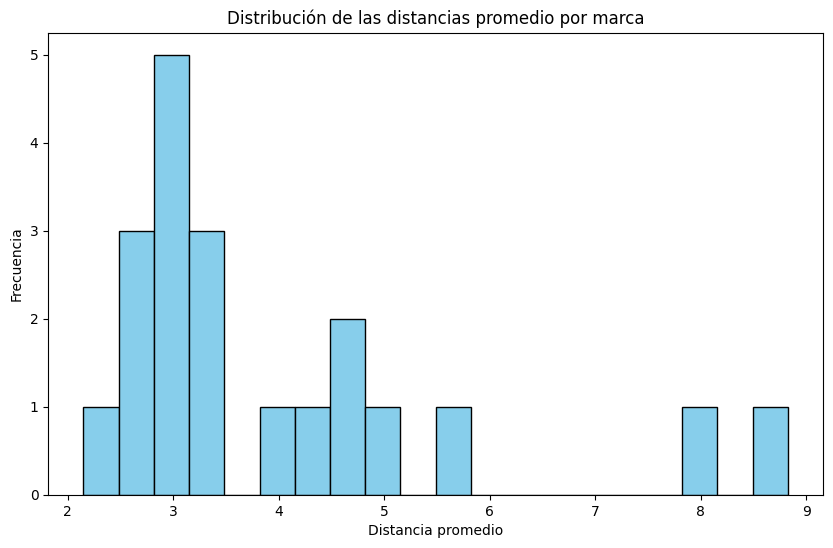

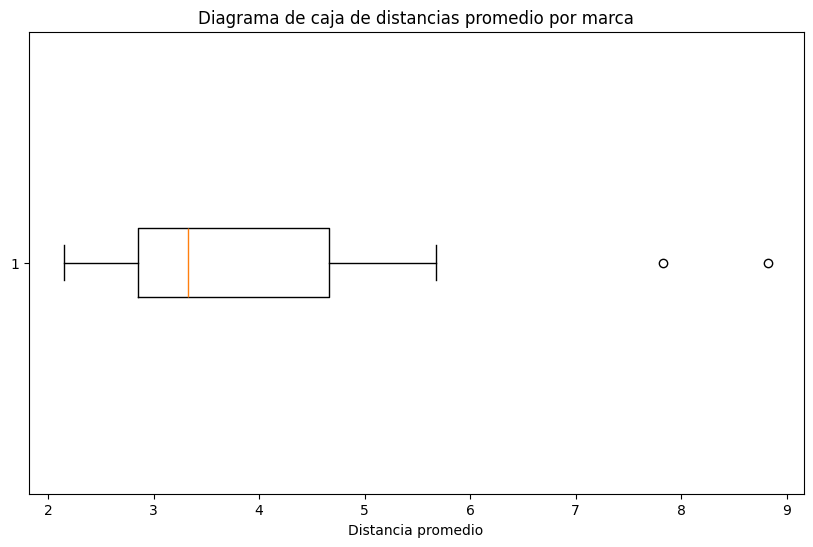

,0,1,2,3
make,,,,
subaru,2.149071,3.415812,3.396699,1.851546
bmw,2.567993,4.832671,4.810801,2.043895
alfa-romero,2.754725,4.860671,4.836317,1.897960
mitsubishi,2.792286,3.611579,3.592976,1.851375
honda,2.839442,2.790379,2.781130,2.925854


In [26]:
buscar_marca_similar(df,'isuzu')

In [27]:
marca='subaru'
tiene_nulos(df,marca)

La marca subaru no tiene valores nulos en 'normalized-losses'.


In [28]:
# Calcular la media de normalized-losses de subaru
subaru_loss = df[df['make'] == 'subaru']['normalized-losses'].mean()

# Asignar el valor de la media a los autos de isuzu con valores nulos en normalized-losses
df.loc[(df['make'] == 'isuzu') & (df['normalized-losses'].isnull()), 'normalized-losses'] = subaru_loss


In [29]:
# Filtrar solo subaru e isuzu y mostrar solo las columnas relevantes
df_subaru_isuzu = df[df['make'].isin(['subaru', 'isuzu'])][['make','normalized-losses', 'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg']]

# Mostrar los resultados
print(df_subaru_isuzu)

       make  normalized-losses  curb-weight  engine-size horsepower  city-mpg  \
43    isuzu              92.25         2337          111         78        24   
44    isuzu              92.25         1874           90         70        38   
45    isuzu              92.25         1909           90         70        38   
46    isuzu              92.25         2734          119         90        24   
138  subaru              83.00         2050           97         69        31   
139  subaru              83.00         2120          108         73        26   
140  subaru              83.00         2240          108         73        26   
141  subaru             102.00         2145          108         82        32   
142  subaru             102.00         2190          108         82        28   
143  subaru             102.00         2340          108         94        26   
144  subaru             102.00         2385          108         82        24   
145  subaru             102.

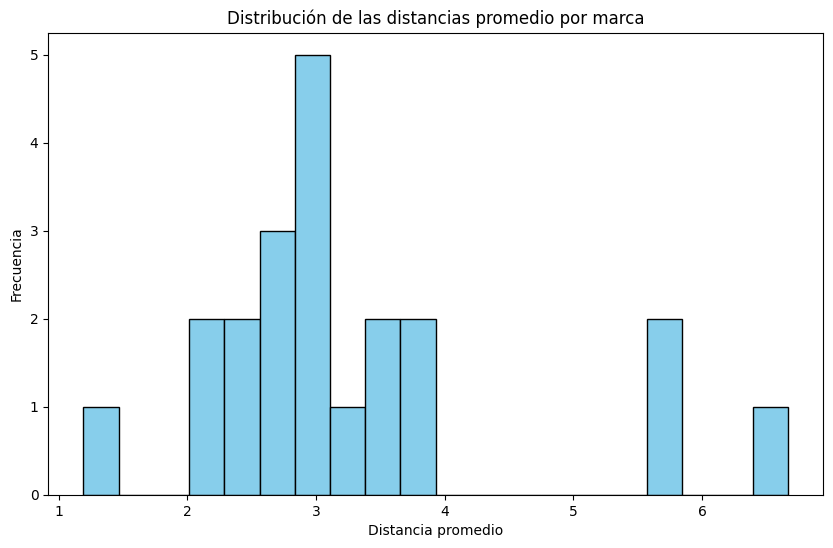

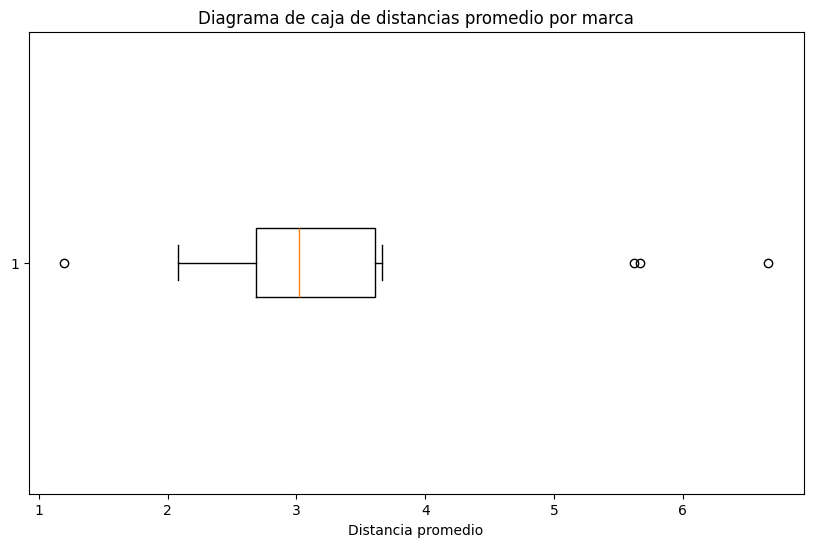

,0,1
make,,
saab,1.192592,2.775456
subaru,2.076494,2.244735
mercury,2.079831,2.808947
audi,2.449312,3.016210
mazda,2.498944,2.613598


In [38]:
# renault
buscar_marca_similar(df,'renault')

In [39]:
marca='saab'
tiene_nulos(df,marca)

La marca saab no tiene valores nulos en 'normalized-losses'.


In [40]:
# Calcular la media de normalized-losses de saab
saab_loss = df[df['make'] == 'saab']['normalized-losses'].mean()

# Asignar el valor de la media a los autos de renault con valores nulos en normalized-losses
df.loc[(df['make'] == 'renault') & (df['normalized-losses'].isnull()), 'normalized-losses'] = saab_loss


In [41]:
# Filtrar solo subaru e saab y renault mostrar solo las columnas relevantes
df_saab_renault = df[df['make'].isin(['saab', 'renault'])][['make','normalized-losses', 'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg']]

# Mostrar los resultados
print(df_saab_renault)

        make  normalized-losses  curb-weight  engine-size horsepower  \
130  renault              127.0         2579          132          ?   
131  renault              127.0         2460          132          ?   
132     saab              150.0         2658          121        110   
133     saab              104.0         2695          121        110   
134     saab              150.0         2707          121        110   
135     saab              104.0         2758          121        110   
136     saab              150.0         2808          121        160   
137     saab              104.0         2847          121        160   

     city-mpg  highway-mpg  
130        23           31  
131        23           31  
132        21           28  
133        21           28  
134        21           28  
135        21           28  
136        19           26  
137        19           26  


In [43]:
ver_resumen_nulos(df)

,datos sin NAs en q,Na en q,Na en %
normalized-losses,185,20,9.76
symboling,205,0,0.00
make,205,0,0.00
fuel-type,205,0,0.00
aspiration,205,0,0.00
num-of-doors,205,0,0.00
body-style,205,0,0.00
drive-wheels,205,0,0.00
engine-location,205,0,0.00
wheel-base,205,0,0.00


In [44]:
marcas_con_nulos = df[df['normalized-losses'].isnull()]['make'].unique()
print(marcas_con_nulos)


['audi' 'jaguar' 'mazda' 'mercedes-benz' 'peugot' 'plymouth' 'porsche'
 'toyota' 'volkswagen']


In [45]:
# Para cada marca con valores nulos, aplicar la media de esa marca
for marca in marcas_con_nulos:
    media_marca = df[df['make'] == marca]['normalized-losses'].mean()
    df.loc[(df['make'] == marca) & (df['normalized-losses'].isnull()), 'normalized-losses'] = media_marca


In [46]:
ver_resumen_nulos(df)

,datos sin NAs en q,Na en q,Na en %
symboling,205,0,0.0
normalized-losses,205,0,0.0
make,205,0,0.0
fuel-type,205,0,0.0
aspiration,205,0,0.0
num-of-doors,205,0,0.0
body-style,205,0,0.0
drive-wheels,205,0,0.0
engine-location,205,0,0.0
wheel-base,205,0,0.0


In [47]:
# La columna price debe ser numerico pero figura como Object debido a que tiene ?
# Concepto: representa una medida normalizada de las pérdidas asociadas con seguros de automóviles. Se refiere a la cantidad estimada 
# de dinero perdido debido a siniestros en comparación con el valor del vehículo. Esta métrica ayuda a evaluar el riesgo asociado a 
# un automóvil en términos de costos de reparación o reemplazo tras un accidente. Los valores más altos indican mayores pérdidas 
# relativas, mientras que los valores bajos sugieren menores costos en situaciones de siniestro.(chatgpt)
df['price'].unique()

array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [49]:
df[df['price']=='?']

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,160.80,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?
44,1,92.25,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,92.25,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,186.00,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


In [51]:
# Convertir la columna 'price' a float64, convirtiendo los no numéricos en NaN
df['price'] = pd.to_numeric(df['price'], errors='coerce')


In [ ]:
df[df['price'].isnull()][['make','price','normalized-losses', 'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg']]

,make,normalized-losses,curb-weight,engine-size,horsepower,city-mpg,highway-mpg
44,isuzu,92.25,1874,90,70,38,43
45,isuzu,92.25,1909,90,70,38,43
129,porsche,186.00,3366,203,288,17,28


In [3]:
df.iloc[9:10][['make','price','normalized-losses', 'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg']]

,make,price,normalized-losses,curb-weight,engine-size,horsepower,city-mpg,highway-mpg
9,audi,?,?,3053,131,160,16,22


In [55]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# Seleccionar columnas numéricas
columns_numericas = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 
                     'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg']

n_neighbors = 5

# Iterar sobre cada marca en el DataFrame
for marca_objetivo in df['make'].unique():
    # Filtrar el DataFrame por la marca
    df_objetivo = df[df['make'] == marca_objetivo]
    
    # Verificar si hay suficientes muestras para aplicar KNN
    if len(df_objetivo) < n_neighbors:
        continue  # Si no hay suficientes muestras, saltar esta marca
    
    # Filtrar las filas donde el precio es nulo
    df_objetivo_nulos = df_objetivo[df_objetivo['price'].isnull()]
    
    # Si no hay precios nulos, continuar con la siguiente marca
    if df_objetivo_nulos.empty:
        continue

    # Filtrar filas con valores no nulos de precio
    df_objetivo_completos = df_objetivo.dropna(subset=['price'])
    
    # Verificar si hay suficientes muestras para aplicar KNN (al menos n_neighbors)
    if len(df_objetivo_completos) < n_neighbors:
        continue  # Si no hay suficientes muestras, saltar esta marca
    
    # Crear el modelo KNN
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    
    # Ajustar el modelo con las filas completas
    knn.fit(df_objetivo_completos[columns_numericas], df_objetivo_completos['price'])
    
    # Predecir los precios para los autos con valores nulos
    precios_imputados = knn.predict(df_objetivo_nulos[columns_numericas])
    
    # Si hay predicciones, actualizar el DataFrame
    if len(precios_imputados) > 0:
        df_objetivo_nulos['price'] = precios_imputados
        # Reemplazar los valores nulos por las predicciones en el DataFrame original
        df.update(df_objetivo_nulos)


In [56]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

# Seleccionar columnas numéricas
columns_numericas = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 
                     'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg']

n_neighbors = 5
marcas_no_imputadas = []  # Lista para almacenar marcas no imputadas

# Iterar sobre cada marca en el DataFrame
for marca_objetivo in df['make'].unique():
    # Filtrar el DataFrame por la marca
    df_objetivo = df[df['make'] == marca_objetivo]
    
    # Verificar si hay suficientes muestras para aplicar KNN
    if len(df_objetivo) < n_neighbors:
        marcas_no_imputadas.append(marca_objetivo)  # Agregar marca a la lista
        continue  # Si no hay suficientes muestras, saltar esta marca
    
    # Filtrar las filas donde el precio es nulo
    df_objetivo_nulos = df_objetivo[df_objetivo['price'].isnull()]
    
    # Si no hay precios nulos, continuar con la siguiente marca
    if df_objetivo_nulos.empty:
        continue

    # Filtrar filas con valores no nulos de precio
    df_objetivo_completos = df_objetivo.dropna(subset=['price'])
    
    # Verificar si hay suficientes muestras para aplicar KNN (al menos n_neighbors)
    if len(df_objetivo_completos) < n_neighbors:
        marcas_no_imputadas.append(marca_objetivo)  # Agregar marca a la lista
        continue  # Si no hay suficientes muestras, saltar esta marca
    
    # Crear el modelo KNN
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    
    # Ajustar el modelo con las filas completas
    knn.fit(df_objetivo_completos[columns_numericas], df_objetivo_completos['price'])
    
    # Predecir los precios para los autos con valores nulos
    precios_imputados = knn.predict(df_objetivo_nulos[columns_numericas])
    
    # Si hay predicciones, actualizar el DataFrame
    if len(precios_imputados) > 0:
        df_objetivo_nulos['price'] = precios_imputados
        # Reemplazar los valores nulos por las predicciones en el DataFrame original
        df.update(df_objetivo_nulos)

# Avisar sobre marcas que no pudieron ser imputadas
if marcas_no_imputadas:
    print(f"Las siguientes marcas no pudieron ser imputadas por falta de suficientes datos: {', '.join(marcas_no_imputadas)}")
else:
    print("Todas las marcas fueron imputadas correctamente.")


Las siguientes marcas no pudieron ser imputadas por falta de suficientes datos: alfa-romero, chevrolet, isuzu, jaguar, mercury, porsche, renault


**FIN Detección y tratamiento de valores nulos.**

In [57]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


In [ ]:
# Visualización de la distribución de las variables numéricas
for column in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de la variable: {column}')
    plt.show()

In [ ]:
# Para variables categóricas
for column in df.select_dtypes(include='object').columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribución de la variable categórica: {column}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
# NO hay valores nulos.
ver_resumen_nulos(df)

In [ ]:
# Detectar columnas con valores únicos ['Yes', 'No']
yes_no_columns = [col for col in df.columns if sorted(df[col].dropna().unique()) == ['No', 'Yes']]
print("Columnas con valores 'Yes' y 'No':", yes_no_columns)
# Aplicar el mapeo 'Yes' -> 1 y 'No' -> 0 a todas las columnas de una vez usando map y itertools
df[yes_no_columns] = pd.DataFrame(
    map(lambda col: df[col].map({'Yes': 1, 'No': 0}), yes_no_columns)
).T.set_axis(yes_no_columns, axis=1)

In [34]:
# Reemplazar '?' por NaN y convertir a tipo numérico
df['normalized-losses'] = df['normalized-losses'].replace('?', np.nan).astype(float)

# Calcular la media de 'normalized-losses' agrupada por las columnas seleccionadas
media_por_grupo = df.groupby(['make', 'body-style', 'drive-wheels', 'fuel-type', 'engine-type'])['normalized-losses'].transform('mean')


In [ ]:
df[media_por_grupo.isnull()]

In [ ]:
# Imputar los valores nulos con la media por grupo
df['normalized-losses'].fillna(media_por_grupo, inplace=True)


In [ ]:
df[media_por_grupo.isnull()]